In [53]:
# Import
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
# Parameters
n = 30
max_threads = 16

In [55]:
numbers = { 
    "SMALL": 3934686214396237,
    "MEDIUM": 975734686214396237,
    "BIG": 17975734686214396237
}

In [56]:
optimization = 'O2'

CSV = {}

for dimension in numbers:
    csv_path = "output_efficient_" + optimization + "_" + dimension + ".csv"
    CSV[dimension] = pd.read_csv(csv_path)

In [61]:
# Execution time

red_backgroud = False

if red_backgroud:
    sns.set_theme(rc={'axes.facecolor':'#4F000B', 'figure.facecolor':'#4F000B'}, font_scale=2)
    plt.figure(figsize=(20, 10))
    plt.rcParams.update({'text.color': 'white',
                        'axes.labelcolor': 'white',
                        'xtick.color': 'white',
                        'ytick.color': 'white',
                        'axes.titlecolor': 'white'})
    plt.grid(color='darkgray', alpha=0.5) 

    line_color = {}
    line_color["SMALL"] = '#FF9B54'
    line_color["MEDIUM"] = 'white'
    line_color["BIG"] = '#CE4257'

    line_width = 2

    
else:
    sns.set_theme(rc={'axes.facecolor':'white', 'figure.facecolor':'white'}, font_scale=2)
    plt.figure(figsize=(20, 10))
    plt.rcParams.update({'text.color': '#4F000B',
                        'axes.labelcolor': '#4F000B',
                        'xtick.color': '#4F000B',
                        'ytick.color': '#4F000B',
                        'axes.titlecolor': '#4F000B'})
    plt.grid(color='#4F000B', alpha=0.3) 
    plt.gca().spines['bottom'].set_color('#4F000B') 
    plt.gca().spines['left'].set_color('#4F000B') 
    plt.gca().spines['right'].set_color('#4F000B') 
    plt.gca().spines['top'].set_color('#4F000B') 

    line_color = {}
    line_color["SMALL"] = '#FF9B54'
    line_color["MEDIUM"] = '#4F000B'
    line_color["BIG"] = '#CE4257'

    line_width = 2




for dimension i2 numbers:

    y_V = []

    ci = []


    for thread in range(1, max_threads+1):

        y_V.append(CSV[dimension][CSV[dimension]["num_threads"] == thread]["execution_time"].mean())
        ci.append(1.96 * (CSV[dimension][CSV[dimension]["num_threads"] == thread]["execution_time"].std() / math.sqrt(n)))


    # plt.errorbar(x=range(1, max_threads+1), y=y_V, fmt='o', yerr=ci, markersize=1, capsize=8, label="95% CI", color=line_color[dimension], lw=3, capthick=2)
    plt.errorbar(x=range(1, max_threads+1), y=y_V, fmt='o', yerr=ci, markersize=1, capsize=8, color=line_color[dimension], lw=3, capthick=2)

    # sns.lineplot(x=range(1, max_threads+1), y=y_V, marker='o', label="Mean", color=line_color[dimension], linewidth=line_width)
    sns.lineplot(x=range(1, max_threads+1), y=y_V, marker='o', color=line_color[dimension], linewidth=line_width)
    

plt.xlabel('Number of Threads used')
plt.ylabel('Mean Execution time in milliseconds [ms]')

plt.ylim(0, 5000)


thread_ticks = sorted(CSV[dimension]['num_threads'].unique())
plt.xticks(thread_ticks)

# plt.legend()
plt.show()

SyntaxError: invalid syntax (1269758940.py, line 47)

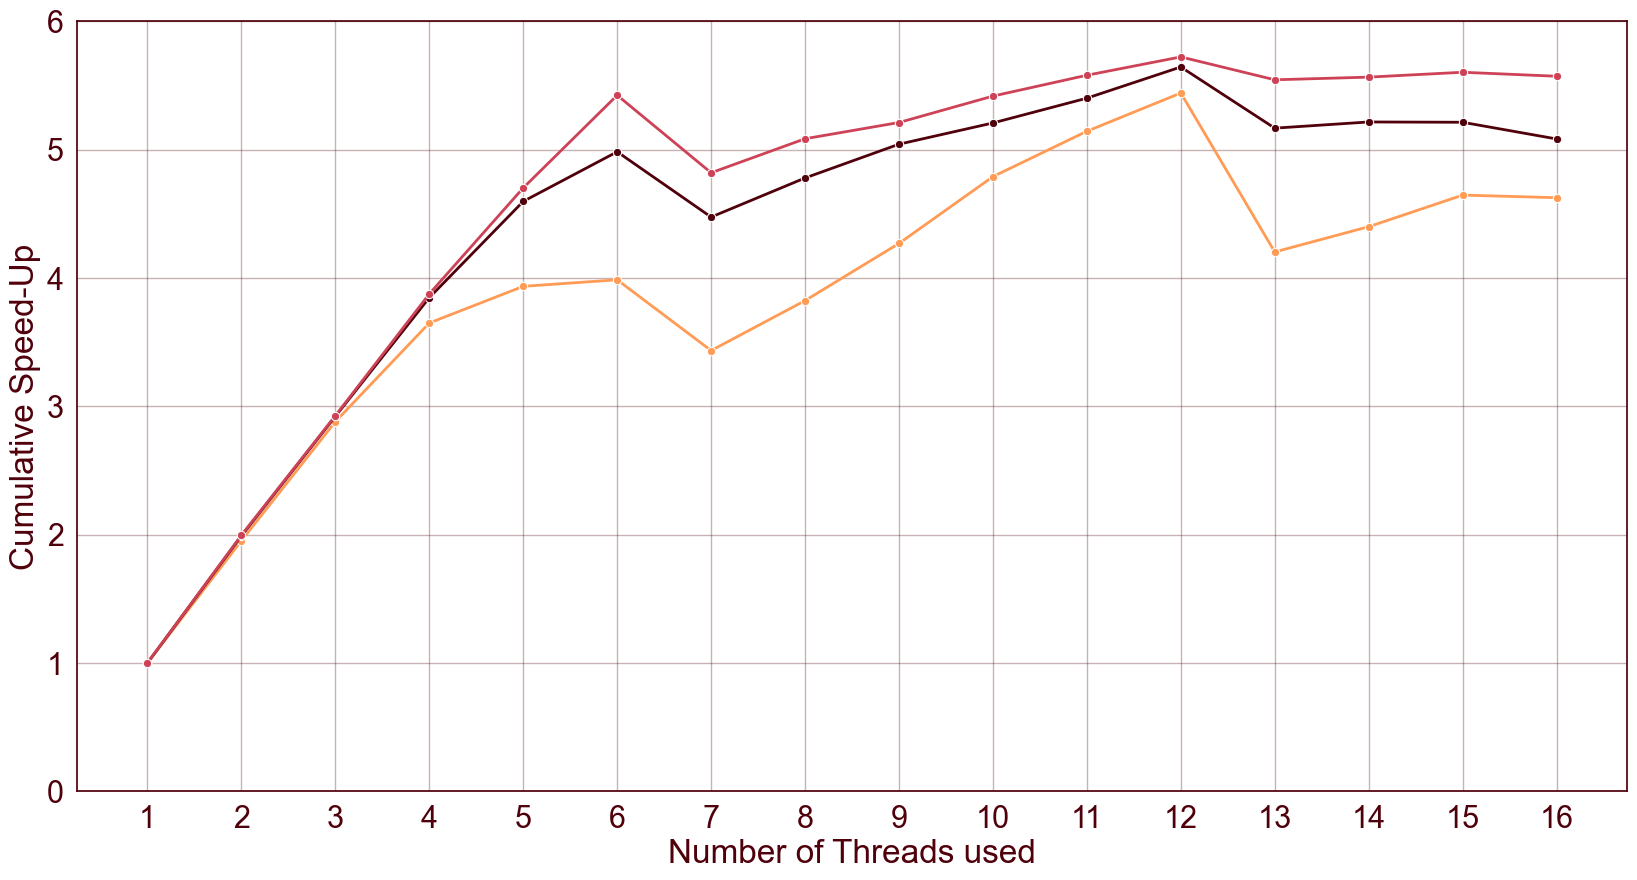

In [58]:
# Cumulative Speedup
red_backgroud = False

if red_backgroud:
    sns.set_theme(rc={'axes.facecolor':'#4F000B', 'figure.facecolor':'#4F000B'}, font_scale=2)
    plt.figure(figsize=(20, 10))
    plt.rcParams.update({'text.color': 'white',
                        'axes.labelcolor': 'white',
                        'xtick.color': 'white',
                        'ytick.color': 'white',
                        'axes.titlecolor': 'white'})
    plt.grid(color='darkgray', alpha=0.5) 

    line_color = {}
    line_color["SMALL"] = '#FF9B54'
    line_color["MEDIUM"] = 'white'
    line_color["BIG"] = '#CE4257'

    line_width = 2

    
else:
    sns.set_theme(rc={'axes.facecolor':'white', 'figure.facecolor':'white'}, font_scale=2)
    plt.figure(figsize=(20, 10))
    plt.rcParams.update({'text.color': '#4F000B',
                        'axes.labelcolor': '#4F000B',
                        'xtick.color': '#4F000B',
                        'ytick.color': '#4F000B',
                        'axes.titlecolor': '#4F000B'})
    plt.grid(color='#4F000B', alpha=0.3) 
    plt.gca().spines['bottom'].set_color('#4F000B') 
    plt.gca().spines['left'].set_color('#4F000B') 
    plt.gca().spines['right'].set_color('#4F000B') 
    plt.gca().spines['top'].set_color('#4F000B') 

    line_color = {}
    line_color["SMALL"] = '#FF9B54'
    line_color["MEDIUM"] = '#4F000B'
    line_color["BIG"] = '#CE4257'

    line_width = 2

for dimension in numbers:

    y_V = []

    ci = []


    for thread in range(1, max_threads+1):

        y_V.append(CSV[dimension][CSV[dimension]["num_threads"] == 1]["execution_time"].mean() / CSV[dimension][CSV[dimension]["num_threads"] == thread]["execution_time"].mean())
        ci.append(1.96 * ((CSV[dimension][CSV[dimension]["num_threads"] == 1]["execution_time"] / CSV[dimension][CSV[dimension]["num_threads"] == thread]["execution_time"].reset_index(drop=True)).std() / math.sqrt(n)))


    # plt.errorbar(x=range(1, max_threads+1), y=y_V, fmt='o', yerr=ci, markersize=1, capsize=8, color=line_color[dimension], label="95% CI", lw=3, capthick=2)

    sns.lineplot(x=range(1, max_threads+1), y=y_V, marker='o', color=line_color[dimension], linewidth=line_width)
    
    
plt.xlabel('Number of Threads used')
plt.ylabel('Cumulative Speed-Up')

thread_ticks = sorted(CSV[dimension]['num_threads'].unique())
plt.xticks(thread_ticks)

plt.ylim(0, 6)

# plt.legend()
plt.show()